#  <font color='purple'>Projet 9:Produisez une étude de marché avec R ou Python

# Table of Contents

* **[Mise en place du jeu de données](#chapter1)**
    * [Importation des librairies](#section_1_1)
    * [Chargement des fichiers](#section_1_2)
    * [Préparation et nettoyage des données](#section_1_3)
* **[Jointures](#chapter2)**  
* **[Détection et isolation des valeurs aberrantes](#chapter3)**
   * [Isolation Forest](#section_3_1)
   * [Classification Hiérarchique Ascenante](#section_3_2)
   * [Analyse en composantes principales](#section_3_3)

# <font color='blue'>Mise en place du jeu de données <a class="anchor" id="chapter1"></a>

## <font color='purple'>Importation des librairies <a class="anchor" id="section_1_1"></a>

In [3237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import decomposition, preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# No warnings
import warnings
warnings.filterwarnings("ignore")

## <font color='purple'>Chargement des fichiers <a class="anchor" id="section_1_2"></a>

In [3238]:
population = pd.read_csv('population_2000_2018.csv')

In [3239]:
dispoAlimentaire = pd.read_csv('DisponibiliteAlimentaire_2017.csv')

In [3240]:
PIB = pd.read_csv('Données PIB.csv')

In [3241]:
stabilitéPolitique= pd.read_csv('Stabilité Politique.csv')

## <font color='purple'>Préparation et nettoyage des données <a class="anchor" id="section_1_3"></a>

### Dataframe population

In [3242]:
# Affichage les 5 premières lignes du dataframe
population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [3243]:
# Affichage les dimensions du dataset
print("Le dataframe population comporte {} observations ".format(population.shape[0]))
print("Le dataframe population comporte {} colonnes".format(population.shape[1]))

Le dataframe population comporte 4411 observations 
Le dataframe population comporte 15 colonnes


In [3244]:
# Observation des données
print(population.shape)
print('')
population.info()

(4411, 15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 

In [3245]:
# Ajout de la colonne Population à l'échelle
population['Population']=population['Valeur']*1000
population

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note,Population
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN,20779953.0
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN,21606988.0
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN,22600770.0
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN,23680871.0
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN,24726684.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,13586.707,X,Sources internationales sûres,NaN,13586707.0
4407,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2015,2015,1000 personnes,13814.629,X,Sources internationales sûres,NaN,13814629.0
4408,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2016,2016,1000 personnes,14030.331,X,Sources internationales sûres,NaN,14030331.0
4409,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,14236.595,X,Sources internationales sûres,NaN,14236595.0


In [3246]:
# Sélection de la population pour l'année 2017
population17= population[population['Année'] == 2017 ]

In [3247]:
# Choix des colonnes intéressantes pour notre analyse
pop17= population17.pivot_table(values='Population', index='Zone', columns='Élément').reset_index()
pop17

Élément,Zone,Population totale
0,Afghanistan,36296113.0
1,Afrique du Sud,57009756.0
2,Albanie,2884169.0
3,Algérie,41389189.0
4,Allemagne,82658409.0
...,...,...
231,Îles Salomon,636039.0
232,Îles Turques-et-Caïques,37115.0
233,Îles Vierges américaines,104751.0
234,Îles Vierges britanniques,29577.0


In [3248]:
# Modification du type de notre donnée Population en Int pour une meilleure lisibilité
pop17=pop17.astype({'Population totale':int})
pop17

Élément,Zone,Population totale
0,Afghanistan,36296113
1,Afrique du Sud,57009756
2,Albanie,2884169
3,Algérie,41389189
4,Allemagne,82658409
...,...,...
231,Îles Salomon,636039
232,Îles Turques-et-Caïques,37115
233,Îles Vierges américaines,104751
234,Îles Vierges britanniques,29577


In [3249]:
pop17.describe()

Élément,Population totale
count,2.360000e+02
mean,3.198362e+07
std,1.318949e+08
min,7.930000e+02
25%,3.803032e+05
50%,5.203510e+06
75%,1.930842e+07
max,1.421022e+09


La population totale varie considérablement d'un pays à l'autre, allant de quelques dizaines de milliers à plus d'un milliard d'habitants.

In [3250]:
# Vérification des pays avec la plus grande population
display(pop17.sort_values(by='Population totale', ascending=False))

Élément,Zone,Population totale
44,"Chine, continentale",1421021791
84,Inde,1338676785
221,États-Unis d'Amérique,325084756
85,Indonésie,264650963
141,Pakistan,207906209
...,...,...
124,Montserrat,4984
227,Îles Falkland (Malvinas),3068
133,Nioué,1609
202,Tokélaou,1300


La Chine continentale et l'Inde, avec leurs populations dépassant le milliard d'habitants, pourraient être considérées comme des valeurs aberrantes (outliers) dans nos analyses en raison de leur taille démographique exceptionnelle.

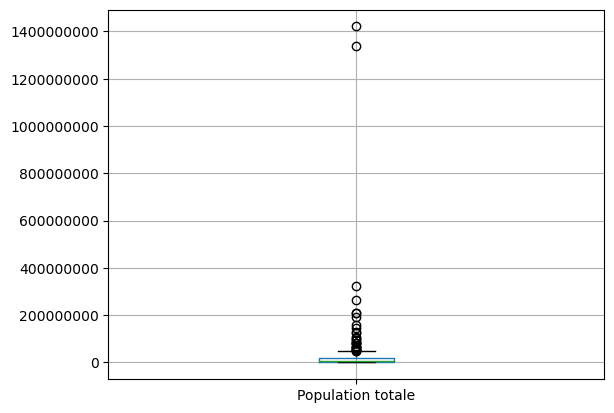

In [3251]:
# Réalisation d'un graphique pour confirmer la présence de potentiels outliers
pop17.boxplot(column='Population totale')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

La Chine continentale et l'Inde, en raison des valeurs exceptionnellement élevées de leur population, sont effectivement considérées comme des valeurs aberrantes (outliers).

In [3252]:
# Vérification des valeurs manquantes
pop17.isnull().sum()

Élément
Zone                 0
Population totale    0
dtype: int64

Le dataframe population ne comporte aucune valeur manquante.

In [3253]:
# Vérification des doublons
pop17.duplicated().sum()

0

### Dataframe DispoAlimimentaire

In [3254]:
# Affichage les 5 premières lignes du dataframe
dispoAlimentaire.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [3255]:
# Affichage les dimensions du dataset
print("Le dataframe dispoAlimentaire comporte {} observations ".format(dispoAlimentaire.shape[0]))
print("Le dataframe dispoAlimentaire comporte {} colonnes".format(dispoAlimentaire.shape[1]))

Le dataframe dispoAlimentaire comporte 176600 observations 
Le dataframe dispoAlimentaire comporte 14 colonnes


In [3256]:
# Observation des données
print(dispoAlimentaire.shape)
print('')
dispoAlimentaire.info()

(176600, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: flo

In [3257]:
# Sélection d'un dataframe uniquement avec de la volaille
volaille = dispoAlimentaire[dispoAlimentaire['Produit'] == 'Viande de Volailles']

In [3258]:
# Création d'un dataframe avec uniquement les variables utiles pour notre analyse 
liste ={'Production','Importations - Quantité','Exportations - Quantité','Disponibilité intérieure','Disponibilité alimentaire en quantité (kg/personne/an)','Disponibilité alimentaire (Kg/personne/an)','Variation de stock'}
DispoAlim_volaille = volaille[volaille['Élément'].isin(liste)]
DispoAlim_volaille

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
651,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,28.00,S,Données standardisées
652,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,29.00,S,Données standardisées
653,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
654,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,57.00,S,Données standardisées
658,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,645,Disponibilité alimentaire en quantité (kg/pers...,2734,Viande de Volailles,2017,2017,kg,1.53,Fc,Donnée calculée
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176388,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,69.00,S,Données standardisées
176389,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,6.00,S,Données standardisées
176390,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5072,Variation de stock,2734,Viande de Volailles,2017,2017,Milliers de tonnes,-0.00,S,Données standardisées
176391,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,76.00,S,Données standardisées


In [3259]:
# Pivot table afin d'obtenir des variables utiles pour notre analyses
dispoAlim_volailles = DispoAlim_volaille.pivot_table(values='Valeur', index='Zone', columns='Élément').reset_index()
dispoAlim_volailles

Élément,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock
0,Afghanistan,1.53,57.0,NaN,29.0,28.0,0.0
1,Afrique du Sud,35.69,2118.0,63.0,514.0,1667.0,0.0
2,Albanie,16.36,47.0,0.0,38.0,13.0,4.0
3,Algérie,6.38,277.0,0.0,2.0,275.0,0.0
4,Allemagne,19.47,1739.0,646.0,842.0,1514.0,-29.0
...,...,...,...,...,...,...,...
167,Émirats arabes unis,43.47,412.0,94.0,433.0,48.0,-26.0
168,Équateur,19.31,341.0,0.0,0.0,340.0,-1.0
169,États-Unis d'Amérique,55.68,18266.0,3692.0,123.0,21914.0,80.0
170,Éthiopie,0.13,14.0,NaN,1.0,14.0,0.0


In [3260]:
# Calcul du taux de dépendance aux imporations de volaille par pays
dispoAlim_volailles['Dép_importations(%)']=(dispoAlim_volailles['Importations - Quantité'] / dispoAlim_volailles['Disponibilité intérieure'])*100

In [3261]:
dispoAlim_volailles.describe()

Élément,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Dép_importations(%)
count,172.000000,170.000000,135.000000,170.000000,168.000000,169.000000,170.000000
mean,20.213372,687.594118,132.185185,89.529412,725.190476,13.668639,45.803811
std,15.860311,2187.184747,513.784440,186.669983,2501.457125,75.364884,51.850021
min,0.130000,2.000000,0.000000,0.000000,0.000000,-119.000000,0.000000
25%,6.440000,30.500000,0.000000,3.000000,13.750000,0.000000,4.233163
50%,18.090000,100.000000,3.000000,16.000000,70.000000,0.000000,24.749473
75%,30.037500,368.250000,32.000000,81.250000,409.750000,7.000000,80.638298
max,72.310000,18266.000000,4223.000000,1069.000000,21914.000000,859.000000,323.928571


La disponibilité alimentaire en quantité (kg/personne/an) a une large gamme, indiquant des différences significatives dans la consommation de poulet par habitant.\
Les exportations et importations de poulet varient également de manière importante entre les pays.\
Le pourcentage dépendance aux importations montre une grande variabilité, ce qui pourrait être un facteur clé dans l'identification des marchés cibles.

In [3262]:
# Identification des pays avec les plus fortes quantités d'exportations
display(dispoAlim_volailles.sort_values(by='Exportations - Quantité',ascending=False))

Élément,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Dép_importations(%)
21,Brésil,48.03,9982.0,4223.0,3.0,14201.0,0.0,0.030054
169,États-Unis d'Amérique,55.68,18266.0,3692.0,123.0,21914.0,80.0,0.673382
117,Pays-Bas,20.33,372.0,1418.0,608.0,1100.0,-82.0,163.440860
119,Pologne,30.30,1156.0,1025.0,55.0,2351.0,225.0,4.757785
151,Thaïlande,12.95,881.0,796.0,2.0,1676.0,1.0,0.227015
...,...,...,...,...,...,...,...,...
152,Timor-Leste,4.24,5.0,NaN,11.0,1.0,7.0,220.000000
156,Turkménistan,4.52,27.0,NaN,9.0,20.0,2.0,33.333333
160,Vanuatu,11.66,3.0,NaN,4.0,1.0,1.0,133.333333
165,Zimbabwe,4.68,76.0,NaN,6.0,69.0,0.0,7.894737


Nous constatons que pour l'année 2017, le Brésil et les États-Unis d'Amérique se distinguent en tant que principaux exportateurs de volailles, tout en affichant un faible taux de dépendance à l'égard des importations. Par conséquent, ces pays ne sont pas pertinents pour notre analyse.

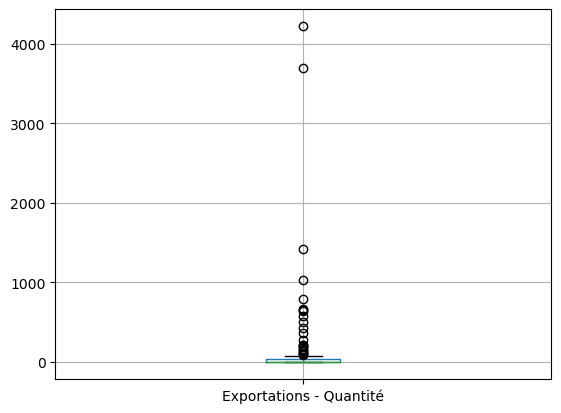

In [3263]:
# Réalisation d'un graphique pour confirmer la présence de potentiels outliers
dispoAlim_volailles.boxplot(column='Exportations - Quantité')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Nous observons effectivement que, en termes d'exportations, le Brésil et les États-Unis d'Amérique sont considérés comme des valeurs aberrantes (outliers).

In [3264]:
# Vérification des valeurs manquantes
dispoAlim_volailles.isnull().sum()

Élément
Zone                                                       0
Disponibilité alimentaire en quantité (kg/personne/an)     0
Disponibilité intérieure                                   2
Exportations - Quantité                                   37
Importations - Quantité                                    2
Production                                                 4
Variation de stock                                         3
Dép_importations(%)                                        2
dtype: int64

On constate qu'il y a énormément de valeurs manquantes au niveau des exportations.

Nous procéderons par imputation à partir de l'équation suivante:

**Disponibilité Intérieure = (Production + Importations - disponibilité alimentaire en quantité + Variation de stock) - Exportations**  
devient alors:  
**Exportations = (Production + Importations - disponibilité alimentaire en quantité + Variation de stock) - Disponibilité Intérieure**

In [3265]:

dispoAlim_volailles['Exportations - Quantité']= dispoAlim_volailles.apply(lambda x : ((x['Production'] + x['Importations - Quantité']
                                                                       - x['Disponibilité alimentaire en quantité (kg/personne/an)']
                                                                       + x['Variation de stock']) - x['Disponibilité intérieure'])
                                                          if pd.isnull(x['Exportations - Quantité']) else x['Exportations - Quantité'], axis=1)

In [3266]:
# Vérification des valeurs manquantes
dispoAlim_volailles.isnull().sum()

Élément
Zone                                                      0
Disponibilité alimentaire en quantité (kg/personne/an)    0
Disponibilité intérieure                                  2
Exportations - Quantité                                   4
Importations - Quantité                                   2
Production                                                4
Variation de stock                                        3
Dép_importations(%)                                       2
dtype: int64

Le dataframe contient désormais un nombre négligeable de valeurs manquantes. Cependant, nous allons quand même examiner les pays affectés par ces données manquantes.

In [3267]:
# Observation des pays contenant des valeurs nulles.
dispoAlim_volailles[dispoAlim_volailles.isna().any(axis=1)]

Élément,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Dép_importations(%)
43,Djibouti,2.68,3.0,NaN,3.0,NaN,0.0,100.000000
92,Maldives,13.50,12.0,NaN,12.0,NaN,0.0,100.000000
113,Ouzbékistan,1.96,NaN,NaN,NaN,NaN,NaN,NaN
122,Pérou,13.47,1523.0,1.0,60.0,1465.0,NaN,3.939593
130,République démocratique populaire lao,10.91,NaN,NaN,NaN,NaN,NaN,NaN


Nous décidons de remplcer les valeurs manquantes par 0.

In [3268]:
# Remplir les valeurs manquantes par 0
dispoAlim_volailles = dispoAlim_volailles.fillna(0)

In [3269]:
# Modification du nom de la variable 'Disponibilité alimentaire en quantité (kg/personne/an)'
dispoAlim_volailles.rename(columns={'Disponibilité alimentaire en quantité (kg/personne/an)': 'Dispo alimentaire(kg/pers/an)'}, inplace=True)

In [3270]:
dispoAlim_volailles

Élément,Zone,Dispo alimentaire(kg/pers/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Dép_importations(%)
0,Afghanistan,1.53,57.0,-1.53,29.0,28.0,0.0,50.877193
1,Afrique du Sud,35.69,2118.0,63.00,514.0,1667.0,0.0,24.268178
2,Albanie,16.36,47.0,0.00,38.0,13.0,4.0,80.851064
3,Algérie,6.38,277.0,0.00,2.0,275.0,0.0,0.722022
4,Allemagne,19.47,1739.0,646.00,842.0,1514.0,-29.0,48.418631
...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,43.47,412.0,94.00,433.0,48.0,-26.0,105.097087
168,Équateur,19.31,341.0,0.00,0.0,340.0,-1.0,0.000000
169,États-Unis d'Amérique,55.68,18266.0,3692.00,123.0,21914.0,80.0,0.673382
170,Éthiopie,0.13,14.0,0.87,1.0,14.0,0.0,7.142857


In [3271]:
# Nouvelle vérification des valeurs manquantes
dispoAlim_volailles.isnull().sum()

Élément
Zone                             0
Dispo alimentaire(kg/pers/an)    0
Disponibilité intérieure         0
Exportations - Quantité          0
Importations - Quantité          0
Production                       0
Variation de stock               0
Dép_importations(%)              0
dtype: int64

Le dataframe dispoAlim_volailles est maintenant exempt de toute valeur manquante.

In [3272]:
# Vérification des doublons
dispoAlim_volailles.duplicated().sum()

0

### Dataframe PIB

In [3273]:
# Affichage les 5 premières lignes du dataframe
PIB.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,48460.512961,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,530.149831,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,710,Afrique du Sud,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,6723.928582,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,8,Albanie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,4521.752219,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,12,Algérie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,4134.936054,X,Ciffre de sources internationales,NaN


In [3274]:
# Affichage les dimensions du dataset
print("Le dataframe PIB comporte {} observations ".format(PIB.shape[0]))
print("Le dataframe PIB comporte {} colonnes".format(PIB.shape[1]))

Le dataframe PIB comporte 211 observations 
Le dataframe PIB comporte 15 colonnes


In [3275]:
# Observation des données
print(PIB.shape)
print('')
PIB.info()

(211, 15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            211 non-null    object 
 1   Domaine                 211 non-null    object 
 2   Code zone (M49)         211 non-null    int64  
 3   Zone                    211 non-null    object 
 4   Code Élément            211 non-null    int64  
 5   Élément                 211 non-null    object 
 6   Code Produit            211 non-null    int64  
 7   Produit                 211 non-null    object 
 8   Code année              211 non-null    int64  
 9   Année                   211 non-null    int64  
 10  Unité                   211 non-null    object 
 11  Valeur                  211 non-null    float64
 12  Symbole                 211 non-null    object 
 13  Description du Symbole  211 non-null    object 
 14  Note                    0 non-n

In [3276]:
# Pivot table afin d'obtenir des variables utiles pour notre analyses
pib = PIB.pivot_table(values='Valeur', index='Zone', columns='Élément').reset_index()
pib

Élément,Zone,Valeur US $ par habitant
0,Afghanistan,530.149831
1,Afrique du Sud,6723.928582
2,Albanie,4521.752219
3,Algérie,4134.936054
4,Allemagne,44670.222288
...,...,...
206,Îles Cook,19868.295217
207,Îles Marshall,4515.261195
208,Îles Salomon,2283.581124
209,Îles Turques-et-Caïques,25659.195864


In [3277]:
pib.rename(columns={'Valeur US $ par habitant': 'PIB par habitant'}, inplace=True)
pib

Élément,Zone,PIB par habitant
0,Afghanistan,530.149831
1,Afrique du Sud,6723.928582
2,Albanie,4521.752219
3,Algérie,4134.936054
4,Allemagne,44670.222288
...,...,...
206,Îles Cook,19868.295217
207,Îles Marshall,4515.261195
208,Îles Salomon,2283.581124
209,Îles Turques-et-Caïques,25659.195864


In [3278]:
pib.describe()

Élément,PIB par habitant
count,211.000000
mean,16886.035415
std,25550.733577
min,295.620936
25%,2082.324019
50%,6450.319585
75%,19806.127104
max,173611.814788


Le PIB par habitant varie considérablement avec un minimum à 295 et un maximum à 173611 US $ par habitant, indiquant une diversité économique significative entre les pays,ce qui pourrait influencer la capacité d'un pays à importer et consommer du poulet.

In [3279]:
# Vérification des pays avec les plus forts PIB
display(pib.sort_values(by='PIB par habitant',ascending=False))

Élément,Zone,PIB par habitant
114,Monaco,173611.814788
99,Liechtenstein,170875.739925
22,Bermudes,112877.376531
101,Luxembourg,110203.008202
175,Suisse,83353.597572
...,...,...
154,République démocratique du Congo,446.618447
150,République centrafricaine,414.740323
171,Somalie,377.349744
173,Soudan du Sud,335.080621


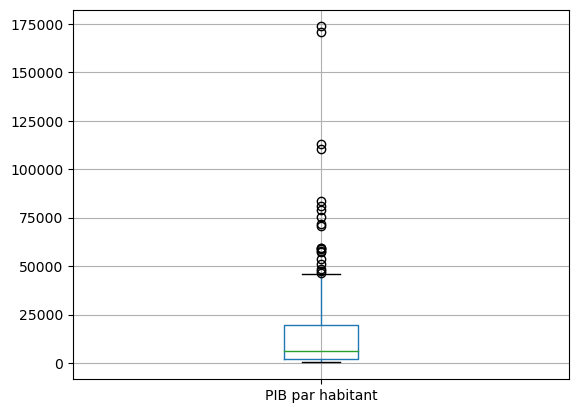

In [3280]:
# Réalisation d'un graphique pour confirmer la présence de potentiels outliers
pib.boxplot(column='PIB par habitant')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Dans notre étude de marché, les pays ayant les économies les plus fortes sont identifiés comme des outliers. Cependant, ce critère demeure pertinent pour notre analyse.

In [3281]:
# Vérification des valeurs manquantes
pib.isnull().sum()

Élément
Zone                0
PIB par habitant    0
dtype: int64

Le dataframe pib ne comporte aucune valeur manquante.

In [3282]:
# Vérification des doublons
pib.duplicated().sum()

0

### Dataframe stabilitéPolitique

In [3283]:
# Affichage les 5 premières lignes du dataframe
stabilitéPolitique.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,528,Pays-Bas (Royaume des),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.92,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.80,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.28,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,8,Albanie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.38,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,12,Algérie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.92,X,Ciffre de sources internationales,NaN


In [3284]:
# Affichage les dimensions du dataset
print("Le dataframe stabilitéPolitique comporte {} observations ".format(stabilitéPolitique.shape[0]))
print("Le dataframe stabilitéPolitique comporte {} colonnes".format(stabilitéPolitique.shape[1]))

Le dataframe stabilitéPolitique comporte 196 observations 
Le dataframe stabilitéPolitique comporte 15 colonnes


In [3285]:
# Observation des données
print(stabilitéPolitique.shape)
print('')
stabilitéPolitique.info()

(196, 15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            196 non-null    object 
 1   Domaine                 196 non-null    object 
 2   Code zone (M49)         196 non-null    int64  
 3   Zone                    196 non-null    object 
 4   Code Élément            196 non-null    int64  
 5   Élément                 196 non-null    object 
 6   Code Produit            196 non-null    int64  
 7   Produit                 196 non-null    object 
 8   Code année              196 non-null    int64  
 9   Année                   196 non-null    int64  
 10  Unité                   196 non-null    object 
 11  Valeur                  196 non-null    float64
 12  Symbole                 196 non-null    object 
 13  Description du Symbole  196 non-null    object 
 14  Note                    0 non-n

In [3286]:
# Pivot table afin d'obtenir des variables utiles pour notre analyses
stabilité_Pol= stabilitéPolitique.pivot_table(values='Valeur', index='Zone', columns='Produit').reset_index()
stabilité_Pol

Produit,Zone,Stabilité politique et absence de violence/terrorisme (indice)
0,Afghanistan,-2.80
1,Afrique du Sud,-0.28
2,Albanie,0.38
3,Algérie,-0.92
4,Allemagne,0.59
...,...,...
191,Érythrée,-0.73
192,États-Unis d'Amérique,0.29
193,Éthiopie,-1.68
194,Îles Marshall,0.87


In [3287]:
stabilité_Pol.rename(columns={'Stabilité politique et absence de violence/terrorisme (indice)': 'Stabilité politique'}, inplace=True)
stabilité_Pol

Produit,Zone,Stabilité politique
0,Afghanistan,-2.80
1,Afrique du Sud,-0.28
2,Albanie,0.38
3,Algérie,-0.92
4,Allemagne,0.59
...,...,...
191,Érythrée,-0.73
192,États-Unis d'Amérique,0.29
193,Éthiopie,-1.68
194,Îles Marshall,0.87


In [3288]:
stabilité_Pol.describe()

Produit,Stabilité politique
count,196.000000
mean,-0.066480
std,0.995164
min,-2.940000
25%,-0.655000
50%,0.035000
75%,0.755000
max,1.920000


La stabilité politique varie aussi considérablement entre les zones avec un minimum à -2.94 et un maximum à 1.92 .

In [3289]:
# Vérification des pays avec les plus forts PIB
display(stabilité_Pol.sort_values(by='Stabilité politique',ascending=True))

Produit,Zone,Stabilité politique
185,Yémen,-2.94
0,Afghanistan,-2.80
139,République arabe syrienne,-2.62
162,Soudan du Sud,-2.45
123,Pakistan,-2.41
...,...,...
5,Andorre,1.42
38,Chine - RAS de Macao,1.43
118,Nouvelle-Zélande,1.60
157,Singapour,1.62


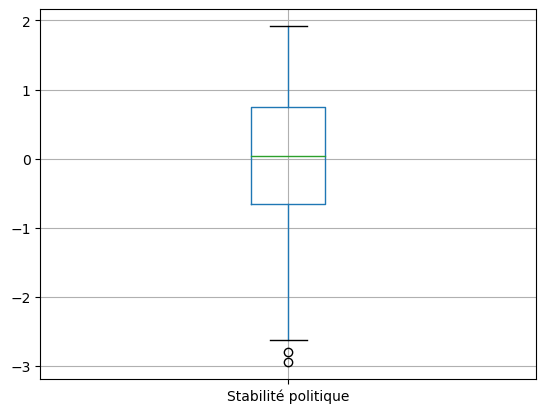

In [3290]:
# Réalisation d'un graphique pour confirmer la présence de potentiels outliers
stabilité_Pol.boxplot(column='Stabilité politique')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Le Yémen et l'Afghanistan, sont perçus comme des nations fortement instables.

In [3291]:
# Vérification des valeurs manquantes
stabilité_Pol.isnull().sum()

Produit
Zone                   0
Stabilité politique    0
dtype: int64

Le dataframe stabilité_Pol ne comporte aucune valeur manquante.

In [3292]:
# Vérification des doublons
stabilité_Pol.duplicated().sum()

0

# <font color='blue'>Jointures <a class="anchor" id="chapter2"></a>

In [3293]:
# Jointures entre tous les dataframes
df_final = pop17.merge(dispoAlim_volailles, on='Zone').merge(pib, on='Zone').merge(stabilité_Pol, on='Zone')
df_final

,Zone,Population totale,Dispo alimentaire(kg/pers/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,Dép_importations(%),PIB par habitant,Stabilité politique
0,Afghanistan,36296113,1.53,57.0,-1.53,29.0,28.0,0.0,50.877193,530.149831,-2.80
1,Afrique du Sud,57009756,35.69,2118.0,63.00,514.0,1667.0,0.0,24.268178,6723.928582,-0.28
2,Albanie,2884169,16.36,47.0,0.00,38.0,13.0,4.0,80.851064,4521.752219,0.38
3,Algérie,41389189,6.38,277.0,0.00,2.0,275.0,0.0,0.722022,4134.936054,-0.92
4,Allemagne,82658409,19.47,1739.0,646.00,842.0,1514.0,-29.0,48.418631,44670.222288,0.59
...,...,...,...,...,...,...,...,...,...,...,...
162,Émirats arabes unis,9487203,43.47,412.0,94.00,433.0,48.0,-26.0,105.097087,42522.377622,0.62
163,Équateur,16785361,19.31,341.0,0.00,0.0,340.0,-1.0,0.000000,6246.404252,-0.07
164,États-Unis d'Amérique,325084756,55.68,18266.0,3692.00,123.0,21914.0,80.0,0.673382,59059.596403,0.29
165,Éthiopie,106399924,0.13,14.0,0.87,1.0,14.0,0.0,7.142857,709.761008,-1.68


In [3294]:
# Vérification des valeurs manquantes
df_final.isnull().sum()

Zone                             0
Population totale                0
Dispo alimentaire(kg/pers/an)    0
Disponibilité intérieure         0
Exportations - Quantité          0
Importations - Quantité          0
Production                       0
Variation de stock               0
Dép_importations(%)              0
PIB par habitant                 0
Stabilité politique              0
dtype: int64

Le dataframe final n'a aucune valeur manquante.

In [3295]:
#Suppresion des variables non nécessaires pour notre analyse
df_final.drop(['Disponibilité intérieure','Production','Variation de stock'], axis=1, inplace=True)
df_final

,Zone,Population totale,Dispo alimentaire(kg/pers/an),Exportations - Quantité,Importations - Quantité,Dép_importations(%),PIB par habitant,Stabilité politique
0,Afghanistan,36296113,1.53,-1.53,29.0,50.877193,530.149831,-2.80
1,Afrique du Sud,57009756,35.69,63.00,514.0,24.268178,6723.928582,-0.28
2,Albanie,2884169,16.36,0.00,38.0,80.851064,4521.752219,0.38
3,Algérie,41389189,6.38,0.00,2.0,0.722022,4134.936054,-0.92
4,Allemagne,82658409,19.47,646.00,842.0,48.418631,44670.222288,0.59
...,...,...,...,...,...,...,...,...
162,Émirats arabes unis,9487203,43.47,94.00,433.0,105.097087,42522.377622,0.62
163,Équateur,16785361,19.31,0.00,0.0,0.000000,6246.404252,-0.07
164,États-Unis d'Amérique,325084756,55.68,3692.00,123.0,0.673382,59059.596403,0.29
165,Éthiopie,106399924,0.13,0.87,1.0,7.142857,709.761008,-1.68


# <font color='blue'>Détection et isolation des valeurs aberrantes <a class="anchor" id="chapter3"></a>

## <font color='purple'>Isolation Forest <a class="anchor" id="section_3_1"></a>Isolation Forest

In [3296]:
# Vérification des outliers avec l'utlisation de: IsolationForest
from sklearn.ensemble import IsolationForest
# Encoder les colonnes catégorielles avec l'encodage one-hot
df_final_encoded = pd.get_dummies(df_final)
# Initialisation du modèle IsolationForest
model = IsolationForest(n_estimators=200, contamination=0.02, random_state=42)
# Ajustement du modèle aux données encodées
model.fit(df_final_encoded)
# Prédiction des outliers
outliers = model.predict(df_final_encoded) == -1
# Extraction des outliers identifiés dans un nouveau DataFrame
out = df_final_encoded[outliers]
out


,Population totale,Dispo alimentaire(kg/pers/an),Exportations - Quantité,Importations - Quantité,Dép_importations(%),PIB par habitant,Stabilité politique,Zone_Afghanistan,Zone_Afrique du Sud,Zone_Albanie,...,Zone_Viet Nam,Zone_Yémen,Zone_Zambie,Zone_Zimbabwe,Zone_Égypte,Zone_Émirats arabes unis,Zone_Équateur,Zone_États-Unis d'Amérique,Zone_Éthiopie,Zone_Îles Salomon
4,82658409,19.47,646.0,842.0,48.418631,44670.222288,0.59,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,207833823,48.03,4223.0,3.0,0.030054,9896.717512,-0.47,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64,1338676785,2.22,4.0,0.0,0.000000,1937.924543,-0.76,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164,325084756,55.68,3692.0,123.0,0.673382,59059.596403,0.29,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [3297]:
# Identification des pays considérés comme des outliers.
lignes_selectionnees = df_final.iloc[[4,21,64,164]]
lignes_selectionnees

,Zone,Population totale,Dispo alimentaire(kg/pers/an),Exportations - Quantité,Importations - Quantité,Dép_importations(%),PIB par habitant,Stabilité politique
4,Allemagne,82658409,19.47,646.0,842.0,48.418631,44670.222288,0.59
21,Brésil,207833823,48.03,4223.0,3.0,0.030054,9896.717512,-0.47
64,Inde,1338676785,2.22,4.0,0.0,0.000000,1937.924543,-0.76
164,États-Unis d'Amérique,325084756,55.68,3692.0,123.0,0.673382,59059.596403,0.29


Il est apparent que le Brésil, l'Inde et les États-Unis d'Amérique sont identifiés comme des outliers dans notre analyse. L'Inde se distingue par sa population exceptionnellement élevée, tandis que le Brésil et les États-Unis se démarquent par leurs taux d'exportation élevés, en particulier en ce qui concerne l'exportation de volailles. Cependant, en raison de leur statut de principaux exportateurs, ils ne sont pas pertinents pour notre étude. Bien que l'Allemagne se distingue par son PIB élevé, un critère important dans notre étude de marché, elle ne sera pas considérée comme un outlier.

##  <font color='purple'>Classification Ascendante Hiérarchique  <a class="anchor" id="section_3_2"></a>

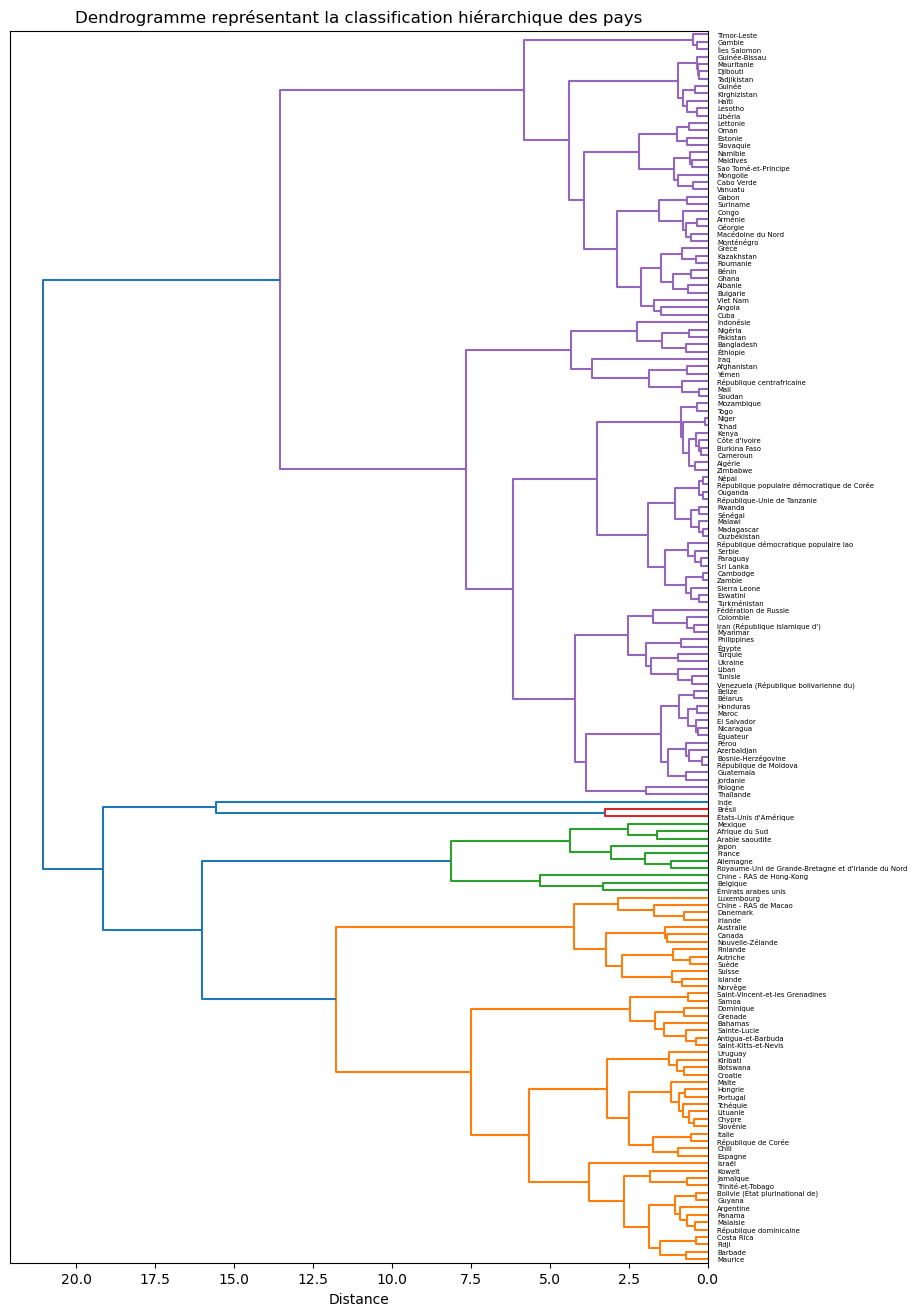

In [3298]:
# Sélection uniquement les colonnes numériques pour le clustering
df_numeric = df_final.select_dtypes(include=[float, int])
# Normalisation des données
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_numeric)
# Calcul du clustering hiérarchique
linked = linkage(df_normalized, method='ward')
# Elaboration et affichage du dendrogramme
plt.figure(figsize=(9,16))
plt.title('Dendrogramme représentant la classification hiérarchique des pays')
plt.xlabel('Distance')
dendrogram(linked,
           orientation='left',
           labels=df_final["Zone"].values,
           distance_sort='descending',
           show_leaf_counts=True)

plt.show()

Nous constatons que l'Inde, le Brésil et les États-Unis partagent des caractéristiques similaires, ils sont distincts des autres. Cette similitude est particulièrement marquée pour le Brésil et les États-Unis, les principaux exportateurs de volailles, tandis que l'Inde se distingue par sa population importante comme observé plus haut.

## <font color='purple'>Analyse en Composantes Principales  <a class="anchor" id="section_3_3"></a>

In [3299]:
# Sélection des colonnes numériques pour l'ACP
df_numeric = df_final.select_dtypes(include=[float, int])
# Transformation des données en array numpy
X = df_numeric.values
X

array([[ 3.62961130e+07,  1.53000000e+00, -1.53000000e+00, ...,
         5.08771930e+01,  5.30149831e+02, -2.80000000e+00],
       [ 5.70097560e+07,  3.56900000e+01,  6.30000000e+01, ...,
         2.42681775e+01,  6.72392858e+03, -2.80000000e-01],
       [ 2.88416900e+06,  1.63600000e+01,  0.00000000e+00, ...,
         8.08510638e+01,  4.52175222e+03,  3.80000000e-01],
       ...,
       [ 3.25084756e+08,  5.56800000e+01,  3.69200000e+03, ...,
         6.73382240e-01,  5.90595964e+04,  2.90000000e-01],
       [ 1.06399924e+08,  1.30000000e-01,  8.70000000e-01, ...,
         7.14285714e+00,  7.09761008e+02, -1.68000000e+00],
       [ 6.36039000e+05,  4.45000000e+00,  0.00000000e+00, ...,
         2.00000000e+02,  2.28358112e+03,  2.00000000e-01]])

In [3300]:
# Normalisation des données
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Création de l'objet PCA avec 2 composantes principales et ajustement des données
pca = decomposition.PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)

# Création du DataFrame pour les composantes principales
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])


(-8.0, 8.0)

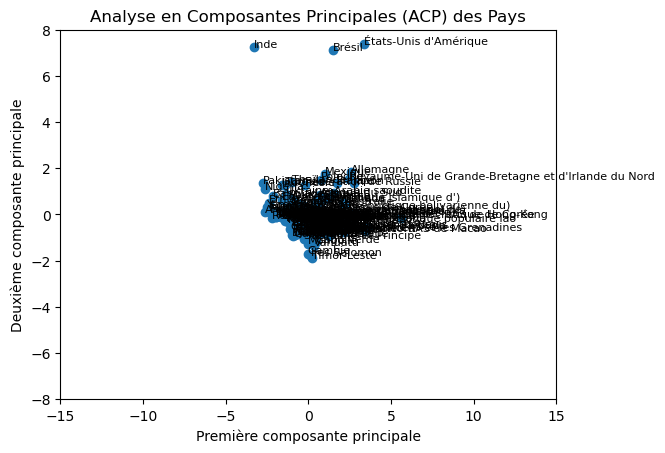

In [3301]:
# Projection de X sur les composantes principales
X_projected = pca.transform(X_scaled)

# Ajout des noms des pays sur les points avec utilisation de la méthode .iloc 
for i, (pc1, pc2) in enumerate(zip(pca_df['PC1'], pca_df['PC2'])):
    plt.text(pc1, pc2, df_final['Zone'].iloc[i], fontsize=8) 

# Visaulisation     
plt.scatter(X_projected[:, 0], X_projected[:, 1])

plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.title('Analyse en Composantes Principales (ACP) des Pays')    
plt.xlim([-15, 15])
plt.ylim([-8, 8])
          


Nous observons à l'aide des trois méthodes utilisées, que trois pays considérés comme des valeurs abérrantes au cours de notre analyse sont nettement distancés des autres dans notre ensemble de données. Afin de ne pas fausser les résultats de notre analyse, nous allons les séparer du dataframe principal et créer un nouveau dataframe spécifique pour ces pays. Cette démarche vise à éviter l'impact négatif que ces points aberrants pourraient avoir sur la formation des clusters, en permettant une agrégation plus cohérente et interprétable des données restantes.

In [3302]:
# Création d'un dataframe avec uniquement les outliers
liste = ['Inde', 'Brésil','États-Unis d\'Amérique']
dfa = df_final[df_final['Zone'].isin(liste)]
dfa

,Zone,Population totale,Dispo alimentaire(kg/pers/an),Exportations - Quantité,Importations - Quantité,Dép_importations(%),PIB par habitant,Stabilité politique
21,Brésil,207833823,48.03,4223.0,3.0,0.030054,9896.717512,-0.47
64,Inde,1338676785,2.22,4.0,0.0,0.000000,1937.924543,-0.76
164,États-Unis d'Amérique,325084756,55.68,3692.0,123.0,0.673382,59059.596403,0.29


In [3303]:
# Suppression des outliers du dataframe principal
df_poulet = df_final[~df_final['Zone'].isin(liste)].reset_index(drop=True)
df_poulet

,Zone,Population totale,Dispo alimentaire(kg/pers/an),Exportations - Quantité,Importations - Quantité,Dép_importations(%),PIB par habitant,Stabilité politique
0,Afghanistan,36296113,1.53,-1.53,29.0,50.877193,530.149831,-2.80
1,Afrique du Sud,57009756,35.69,63.00,514.0,24.268178,6723.928582,-0.28
2,Albanie,2884169,16.36,0.00,38.0,80.851064,4521.752219,0.38
3,Algérie,41389189,6.38,0.00,2.0,0.722022,4134.936054,-0.92
4,Allemagne,82658409,19.47,646.00,842.0,48.418631,44670.222288,0.59
...,...,...,...,...,...,...,...,...
159,Égypte,96442591,12.96,1.00,110.0,8.800000,1917.049576,-1.42
160,Émirats arabes unis,9487203,43.47,94.00,433.0,105.097087,42522.377622,0.62
161,Équateur,16785361,19.31,0.00,0.0,0.000000,6246.404252,-0.07
162,Éthiopie,106399924,0.13,0.87,1.0,7.142857,709.761008,-1.68


In [3304]:
# Exportation du df_poulet vers un fichier csv
df_poulet.to_csv('df_poulet.csv')